Check how weights and Sigma_C behave a function of true redshift on the range of redshifts where we assume IA exist. This is important for whether we can pull gamma_IA out of sums in the Blazek et al. 2012 method.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import shared_functions_setup as setup
import constrain_IA_BlazekMethod as Bl

SURVEY= LSST_DESI


In [2]:
SURVEY = 'LSST_DESI'
if (SURVEY=='SDSS'):
	import params as pa
elif (SURVEY=='LSST_DESI'):
	import params_LSST_DESI as pa
else:
	print "We don't have support for that survey yet; exiting."
	exit()

In [3]:
# We need to map spectroscopic redshifts onto photometric for weights.
# Get interpolating functions which map redshift onto comoving
zofcom, com_of_z = setup.z_interpof_com(SURVEY)

# Get the vector of spectroscopic redshifts we care about:
#chi_l = com_of_z(pa.zeff)
#zIAmax = zofcom(chi_l)
#print "zIAmax=", zIAmax

#zph = [0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46]
zph = [0.78, 0.8, 0.82, 0.86, 0.9, 1.0, 1.2]
zsvec = np.linspace(0., 2., 100)

#zsvec_longer = np.linspace(pa.zeff, 0.4, 20)

In [12]:
# At each zspec value, sample from p(zs, zp) to get many zphoto values, then get the mean weight for these

"""weights_avg = np.zeros(len(zsvec))
for zsi in range(0,len(zsvec)):
    zphs = np.random.normal(zsvec[zsi], pa.pzpar_fid[0] * (1+zsvec[zsi]), 1000000)
    for i in range(0, len(zphs)):
        if (zphs[i]<0.):
            zphs[i] = 0.0001
    ws = weights(pa.e_rms_a, zphs, pa.zeff)
    weights_avg[zsi] = np.mean(ws)"""
sigz = pa.pzpar_fid[0]
zp = zph[4]
pz = np.exp(-(zsvec - zp)**2 / (2.*( sigz *(1.+zsvec))**2)) / (np.sqrt(2.*np.pi)*(sigz*(1.+zsvec)))
    

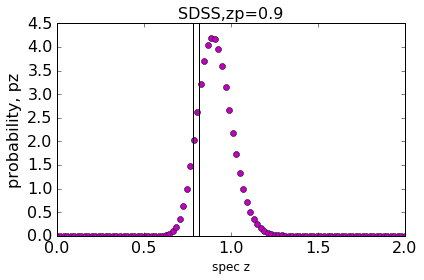

In [13]:
plt.figure()
plt.plot(zsvec, pz, 'mo')
plt.ylabel('probability, pz', fontsize=16)
plt.xlabel('spec z', fontsize = 12)
plt.axvline(x=0.78, color='k')
plt.hold(True)
plt.axvline(x=0.82, color='k')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.title('SDSS,zp='+str(zp), fontsize=16)
plt.tight_layout()
plt.savefig('./plots/pz_zph='+str(zp)+'_LSST.pdf')